In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [5]:
# Load your dataset
data = pd.read_csv('../data/data.csv')

# Extract relevant features for clustering
selected_features = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
X = data[selected_features]

In [6]:
# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


C:\Users\itimu\Documents\TuneFlow\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

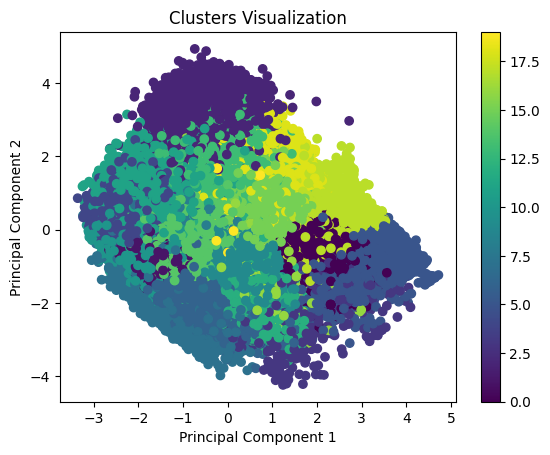

In [15]:
# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization')
plt.colorbar()
plt.show()

In [16]:
# Analyze and interpret clusters
cluster_df = pd.DataFrame(X, columns=selected_features)
cluster_df['cluster'] = clusters
cluster_means = cluster_df.groupby('cluster').mean()

In [18]:
cluster_means

,valence,acousticness,danceability,energy,instrumentalness,liveness,speechiness
cluster,,,,,,,
0,0.200146,0.886977,0.301609,0.189722,0.041804,0.170318,0.041330
1,0.713500,0.092749,0.542074,0.796011,0.021319,0.122108,0.057655
2,0.528210,0.520859,0.677147,0.246247,0.007587,0.301257,0.904438
3,0.367902,0.732819,0.357509,0.430615,0.800509,0.632024,0.069138
4,0.842406,0.196965,0.764769,0.647458,0.026482,0.111134,0.064360
5,0.111647,0.892046,0.223305,0.150391,0.832149,0.145114,0.041719
6,0.360366,0.044242,0.390390,0.856947,0.041346,0.205526,0.086941
7,0.528749,0.170337,0.487989,0.781914,0.067579,0.780503,0.109198
8,0.795474,0.621977,0.579174,0.557600,0.020145,0.140344,0.056339


In [19]:
# Assuming X_scaled contains your preprocessed dataset features
new_song_features = np.array([0.200146, 0.886977, 0.301609, 0.189722, 0.041804, 0.170318, 0.041330])
new_song_features_scaled = scaler.transform(new_song_features.reshape(1, -1))

# Predict the cluster label for the new song
predicted_cluster = kmeans.predict(new_song_features_scaled)

print(f"The new song belongs to cluster {predicted_cluster[0]}")


The new song belongs to cluster 0


C:\Users\itimu\Documents\TuneFlow\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
# Assuming X_scaled contains your preprocessed dataset features
new_song_features = np.array([0.3, 0.2, 0.3, 0.1, 0.9, 0.2, 0.5])
new_song_features_scaled = scaler.transform(new_song_features.reshape(1, -1))

# Predict the cluster label for the new song
predicted_cluster = kmeans.predict(new_song_features_scaled)

print(f"The new song belongs to cluster {predicted_cluster[0]}")


The new song belongs to cluster 5


C:\Users\itimu\Documents\TuneFlow\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Assuming cluster_df contains your original dataset features along with cluster labels

# Define the features of the new song
new_song_features = np.array([0.200146, 0.886977, 0.301609, 0.189722, 0.041804, 0.170318, 0.041330])
new_song_features_scaled = scaler.transform(new_song_features.reshape(1, -1))

# Predict the cluster label for the new song
predicted_cluster = kmeans.predict(new_song_features_scaled)[0]

# Get all songs within the predicted cluster
songs_in_cluster = data[cluster_df['cluster'] == predicted_cluster]

# Calculate distances/similarities between the new song and all other songs in the cluster
distances = np.linalg.norm(songs_in_cluster[selected_features].values - new_song_features_scaled, axis=1)

# Sort songs based on distances and get the top 10 closest songs
closest_song_indices = np.argsort(distances)[:10]
closest_songs = songs_in_cluster.iloc[closest_song_indices]

print("Top 10 songs closest to the new song:")
print(closest_songs[['name', 'artists', 'valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']])


Top 10 songs closest to the new song:
                                                     name  \
169968                                   Brain Relaxation   
56641                                      Big Fan Dulled   
25066                One Morning in May - Another Version   
26478   A Mighty Fortress is Our God from Cantata No. ...   
124431                                             Clover   
38348                                     Tepid Rainscape   
83015                                   Ride Me Down Easy   
124086                           Soothing Deep Pink Noise   
42431   Messiah, HWV 56, Pt. 3: Behold, I tell you a m...   
123890  Premium Brown Noise: Best of Constant Pacific ...   

                                                  artists  valence  \
169968                                     ['Fabricants']      0.0   
56641                               ['The Noise Project']      0.0   
25066                                    ['Jean Ritchie']      0.0   
26478   ['

C:\Users\itimu\Documents\TuneFlow\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
